<a href="https://colab.research.google.com/github/anushkagupta1307/IR2022_A3_27/blob/main/IR_Assignment_peer_to_peer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Open the TSV Data file downloaded from snap and convert it to a list of list
list_of_lists=[]
ccfile=open('p2p-Gnutella04.txt', "r",encoding="utf8", errors="surrogateescape")
for aline in ccfile:
  tab_separated_temp_file=aline.split('\t')
  list=[]
  for word in tab_separated_temp_file:
    list.append(word)

  list_of_lists.append(list)
  


In [ ]:
#Convert the list of lists to a dataframe
import pandas as pd
df=pd.DataFrame(list_of_lists)


In [ ]:
df

,0,1
0,# Directed graph (each unordered pair of nodes...,None
1,# Directed Gnutella P2P network from August 4 ...,None
2,# Nodes: 10876 Edges: 39994\n,None
3,# FromNodeId,ToNodeId\n
4,0,1\n
...,...,...
39993,10874,3251\n
39994,10874,5543\n
39995,10874,9711\n
39996,10874,10875\n


In [ ]:
#Dropping columns which describe the dataset
df.drop([0,1,2,3], axis=0, inplace=True)
#Reset the indexes in the dataframe
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,0,1
0,0,1\n
1,0,2\n
2,0,3\n
3,0,4\n
4,0,5\n
...,...,...
39989,10874,3251\n
39990,10874,5543\n
39991,10874,9711\n
39992,10874,10875\n


In [ ]:
#Give headings to dataframe columns
df.columns=['From Node','To Node']

In [ ]:
df

,From Node,To Node
0,0,1\n
1,0,2\n
2,0,3\n
3,0,4\n
4,0,5\n
...,...,...
39989,10874,3251\n
39990,10874,5543\n
39991,10874,9711\n
39992,10874,10875\n


In [ ]:
df['To Node'][39992][:-1]

'10875'

In [ ]:
#Converting the column values to Integer
for i in range(len(df)):
  df['From Node'][i]=int(df['From Node'][i])
  df['To Node'][i]=int(df['To Node'][i][:-1])

In [ ]:
df

,From Node,To Node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
39989,10874,3251
39990,10874,5543
39991,10874,9711
39992,10874,10875


**Number of Nodes**

In [ ]:
#Get all unique node ids from the columns 'From node' and 'To node' and add them to a list
list_of_nodes=[]
for i in range(len(df)):
  if df['From Node'][i] not in list_of_nodes:
    list_of_nodes.append(df['From Node'][i])
  if df['To Node'][i] not in list_of_nodes:
    list_of_nodes.append(df['To Node'][i])

In [ ]:
if 10878 in list_of_nodes:
  print("hello")
  

hello


In [ ]:
#Print the number of nodes in the list by getting the length of list with unique node ids
number_of_nodes=len(list_of_nodes)
print(len(list_of_nodes))
print(number_of_nodes)

10876
10876


In [ ]:
list_of_nodes.sort()

In [ ]:
list_of_nodes[10874:]

[10877, 10878]

In [ ]:
list_of_nodes.insert(0,"Node")

In [ ]:

print(len(list_of_nodes))

10877


**Number of Edges**

In [ ]:
#Count the number of rows in the dataframe- it will give the number of edges
count=0
for i in range(len(df)):
  count=count+1

print(count)


39994


In [ ]:
number_of_edges=count

**Adjacency Matrix**

In [ ]:
#Create an empty dataframe of size - number of nodes* number of nodes+1
#We added 1 to the column to accomodate the node number
import numpy as np
temp_zeros=np.zeros((len(list_of_nodes)-1,len(list_of_nodes)))
adjacency_matrix=pd.DataFrame(data=temp_zeros,columns=list_of_nodes,dtype=int)

In [ ]:
adjacency_matrix

,Node,0,1,2,3,4,5,6,7,8,...,10869,10870,10871,10872,10873,10874,10875,10876,10877,10878
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Populated the node number in the 'Node' column of the adjacency matrix
for i in range(1,len(list_of_nodes),1):
  adjacency_matrix['Node'][i-1]=list_of_nodes[i]

In [ ]:
adjacency_matrix

,Node,0,1,2,3,4,5,6,7,8,...,10869,10870,10871,10872,10873,10874,10875,10876,10877,10878
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,10874,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,10875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10873,10876,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,10877,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df=df[df['From Node']==0]

In [ ]:
temp_df

,From Node,To Node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
5,0,6
6,0,7
7,0,8
8,0,9
9,0,10


In [ ]:
#Populate the adjacency matrix by getting the edges between node numbers- 
#put 1 where there is an edge between the nodes
for i in range(len(adjacency_matrix)):
  x=adjacency_matrix['Node'][i]
  #print(x)
  temp_df=df[df['From Node']==x]
  temp_df.reset_index(drop=True, inplace=True)
  #print(temp_df)
  for j in range(len(temp_df)):
    #print(x)
    #print(temp_df['To Node'][j])
    adjacency_matrix.at[x,temp_df['To Node'][j]]=1



In [ ]:
#Print the adjacency matrix
adjacency_matrix

,Node,0,1,2,3,4,5,6,7,8,...,10869,10870,10871,10872,10873,10874,10875,10876,10877,10878
0,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,10874,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,10875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10873,10876,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,10877,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


**Edge List**

In [ ]:
#Edge list consists of List of list - each list has the node numbers which have an edge between them
edge_list=[]
for i in range(len(df)):
  temp_list=[]
  temp_list.append(int(df['From Node'][i]))
  tenp_num=int(df['To Node'][i])
  temp_list.append(tenp_num)
  edge_list.append(temp_list)
  

In [ ]:
#Print the edge list
edge_list

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [1, 2],
 [1, 11],
 [1, 12],
 [1, 13],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18],
 [1, 19],
 [3, 20],
 [3, 21],
 [3, 22],
 [3, 23],
 [3, 24],
 [3, 25],
 [3, 26],
 [3, 27],
 [3, 28],
 [3, 29],
 [8, 30],
 [8, 31],
 [8, 32],
 [8, 33],
 [8, 34],
 [8, 35],
 [8, 36],
 [8, 37],
 [8, 38],
 [8, 39],
 [10, 41],
 [10, 136],
 [10, 137],
 [10, 138],
 [10, 139],
 [10, 140],
 [10, 141],
 [10, 142],
 [10, 143],
 [10, 144],
 [12, 40],
 [12, 41],
 [12, 42],
 [12, 43],
 [12, 44],
 [12, 45],
 [12, 46],
 [12, 47],
 [12, 48],
 [12, 49],
 [14, 199],
 [14, 756],
 [14, 1116],
 [14, 2537],
 [14, 2787],
 [14, 3307],
 [14, 4524],
 [14, 4674],
 [14, 6016],
 [14, 7040],
 [17, 79],
 [17, 80],
 [17, 81],
 [17, 82],
 [17, 83],
 [17, 84],
 [17, 85],
 [17, 86],
 [17, 87],
 [17, 88],
 [19, 69],
 [19, 70],
 [19, 71],
 [19, 72],
 [19, 73],
 [19, 74],
 [19, 75],
 [19, 76],
 [19, 77],
 [19, 78],
 [20, 50],
 [20, 51],
 [20, 52],


**Avg In Degree**

In [ ]:
#For each node get the number of edges pointing to that node
#Create a dictionary which has node number as the key and the degree of that node as the value 
in_degree=dict()
for i in range(len(df)):
  if df['To Node'][i] not in in_degree:
    in_degree[df['To Node'][i]]=1
  else:
    in_degree[df['To Node'][i]]=in_degree[df['To Node'][i]]+1


In [ ]:
in_degree

{1: 4,
 2: 9,
 3: 6,
 4: 16,
 5: 7,
 6: 8,
 7: 5,
 8: 1,
 9: 17,
 10: 4,
 11: 12,
 12: 2,
 13: 11,
 14: 3,
 15: 4,
 16: 9,
 17: 5,
 18: 11,
 19: 4,
 20: 4,
 21: 1,
 22: 6,
 23: 4,
 24: 1,
 25: 8,
 26: 8,
 27: 5,
 28: 1,
 29: 2,
 30: 14,
 31: 11,
 32: 1,
 33: 13,
 34: 6,
 35: 10,
 36: 4,
 37: 4,
 38: 4,
 39: 6,
 41: 5,
 136: 6,
 137: 14,
 138: 6,
 139: 2,
 140: 10,
 141: 7,
 142: 4,
 143: 5,
 144: 1,
 40: 5,
 42: 4,
 43: 1,
 44: 17,
 45: 7,
 46: 9,
 47: 2,
 48: 9,
 49: 1,
 199: 10,
 756: 16,
 1116: 22,
 2537: 4,
 2787: 20,
 3307: 9,
 4524: 6,
 4674: 5,
 6016: 4,
 7040: 2,
 79: 10,
 80: 3,
 81: 7,
 82: 1,
 83: 13,
 84: 4,
 85: 7,
 86: 7,
 87: 9,
 88: 3,
 69: 8,
 70: 3,
 71: 16,
 72: 3,
 73: 5,
 74: 9,
 75: 11,
 76: 5,
 77: 3,
 78: 3,
 50: 3,
 51: 3,
 52: 11,
 53: 6,
 54: 7,
 55: 4,
 56: 1,
 57: 7,
 58: 15,
 59: 2,
 60: 1,
 61: 5,
 62: 1,
 63: 3,
 64: 1,
 65: 9,
 66: 13,
 67: 9,
 68: 2,
 108: 4,
 109: 4,
 110: 14,
 111: 1,
 112: 2,
 113: 2,
 114: 9,
 115: 6,
 116: 1,
 98: 9,
 99: 30,
 100

In [ ]:
#Get the sum of degrees of all nodes from the above dictionary
average_in_degree=0
for key, value in in_degree.items():
    average_in_degree=average_in_degree+value


In [ ]:
#Divide the sum of degrees of all nodes by the number of nodes to get the average in degree value
average_in_degree=average_in_degree/len(in_degree)

In [ ]:
#Print the average in degree
print(average_in_degree)

3.684045689019897


**Max-InDegree**

In [ ]:
#Get the key with the maximum value in the above dictionary to get the Node with maximum degree
Keymax = max(in_degree, key= lambda x: in_degree[x])
print(Keymax)

1054


In [ ]:
#Get the node number and maximum degree
maxval = max(in_degree.values())
res = [(k, v) for k, v in in_degree.items() if v == maxval]

In [ ]:
#Print node with maximum degree
res

[(1054, 72)]

**Avg Out Degree**

In [ ]:
#Number of edges going out from a node represent the out degree of that node
#Create a dictionary with the node number as the key and the out degree of that node as the value
out_degree=dict()
for i in range(len(df)):
  if df['From Node'][i] not in out_degree:
    out_degree[df['From Node'][i]]=1
  else:
    out_degree[df['From Node'][i]]=out_degree[df['From Node'][i]]+1



In [ ]:
#Print the out degree dictionary
out_degree

{0: 10,
 1: 10,
 3: 10,
 8: 10,
 10: 10,
 12: 10,
 14: 10,
 17: 10,
 19: 10,
 20: 10,
 21: 10,
 23: 9,
 25: 10,
 26: 10,
 29: 1,
 30: 2,
 38: 10,
 39: 10,
 46: 10,
 54: 10,
 58: 10,
 60: 1,
 61: 1,
 62: 9,
 65: 10,
 73: 10,
 75: 10,
 76: 10,
 77: 10,
 78: 3,
 80: 9,
 81: 10,
 83: 10,
 84: 10,
 87: 9,
 88: 10,
 89: 10,
 90: 10,
 91: 10,
 92: 10,
 93: 9,
 94: 10,
 96: 10,
 97: 19,
 99: 16,
 101: 8,
 106: 9,
 107: 9,
 108: 1,
 109: 10,
 111: 1,
 112: 10,
 113: 9,
 115: 10,
 116: 1,
 118: 10,
 119: 10,
 120: 10,
 121: 10,
 122: 5,
 123: 10,
 124: 10,
 125: 10,
 126: 3,
 127: 10,
 128: 10,
 129: 10,
 130: 10,
 131: 10,
 132: 10,
 133: 10,
 136: 10,
 137: 10,
 141: 10,
 144: 10,
 147: 10,
 148: 10,
 150: 10,
 153: 10,
 154: 10,
 157: 10,
 158: 8,
 162: 10,
 165: 10,
 166: 10,
 167: 10,
 168: 10,
 170: 10,
 171: 10,
 175: 10,
 176: 10,
 177: 1,
 180: 10,
 181: 10,
 183: 1,
 184: 10,
 185: 2,
 187: 10,
 189: 10,
 190: 10,
 192: 9,
 193: 1,
 194: 10,
 195: 10,
 198: 10,
 200: 10,
 201: 10,
 206

In [ ]:
#Get the sum of all out degrees of all nodes from the above dictionary
average_out_degree=0
for key, value in out_degree.items():
    average_out_degree=average_out_degree+value


In [ ]:
#Divide the sum of all outdegrees by the number of nodes to get the average out degree
average_out_degree=average_out_degree/len(out_degree)

In [ ]:
#Print the average out degree
print(average_out_degree)

8.104154002026343


**Max - Out Degree**

In [ ]:
#get the key with maximum value to get the maximum out degree
Keymax = max(out_degree, key= lambda x: out_degree[x])
print(Keymax)

3109


In [ ]:
#get the key and value with maximum outdegree
maxval = max(out_degree.values())
res = [(k, v) for k, v in out_degree.items() if v == maxval]

In [ ]:
#Print the node number and max out degree
res

[(3109, 100)]

**Density of the Network**

In [ ]:
#For a directional graph, the density of the graph is given by- Edges/(Nodes)(Nodes-1)
density=float(float(number_of_edges)/(float(number_of_nodes)*float(number_of_nodes-1)))
print(density)

0.0003381398671756435


**Degree Distribution of the Network**

In [ ]:
#Degree distribution is the number of nodes with each degree value-
#Here we create a dictionary with degree value as the key and the number of nodes having that degree  as the value
#We do this for in degree first
in_degree_count=dict()
for key, value in in_degree.items():
  if value not in in_degree_count:
    in_degree_count[value]=1
  else:
    in_degree_count[value]=in_degree_count[value]+1



In [ ]:
#Print the dictionary with indegree as the key and the number of nodes having that indegree as the value
in_degree_count

{1: 3837,
 2: 1995,
 3: 1250,
 4: 961,
 5: 672,
 6: 508,
 7: 416,
 8: 289,
 9: 215,
 10: 187,
 11: 100,
 12: 85,
 13: 45,
 14: 44,
 15: 41,
 16: 25,
 17: 25,
 18: 20,
 19: 16,
 20: 12,
 21: 14,
 22: 8,
 23: 8,
 24: 6,
 25: 9,
 26: 7,
 27: 6,
 28: 2,
 29: 4,
 30: 2,
 31: 5,
 32: 5,
 33: 6,
 34: 2,
 35: 2,
 36: 3,
 37: 4,
 38: 1,
 40: 1,
 41: 2,
 42: 2,
 44: 1,
 45: 2,
 46: 1,
 47: 1,
 48: 2,
 49: 1,
 51: 1,
 52: 1,
 53: 1,
 56: 1,
 65: 1,
 72: 1}

In [ ]:
#Create a separate list of keys and values- requires for plotting graph
keys=[]
for i in in_degree_count.keys():
  keys.append(i)

values=[]
for i in in_degree_count.values():
  values.append(i)
  

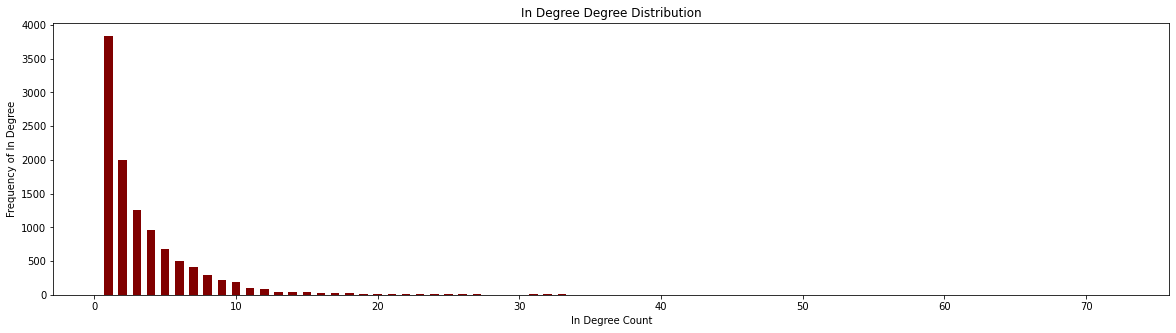

In [ ]:
#Plot bar graph with in degree count on the x axis and the number of noes/ frequency of that degree on the y axis
import matplotlib.pyplot as plt
  
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='maroon',width = 0.6)
 
plt.xlabel("In Degree Count")
plt.ylabel("Frequency of In Degree")
plt.title("In Degree Degree Distribution")
plt.show()

In [ ]:
#Similary create a dictionary for out degree distribution
#Key is the out degree and the number of nodes having that out degree is the value in the dictionary
out_degree_count=dict()
for key, value in out_degree.items():
  if value not in out_degree_count:
    out_degree_count[value]=1
  else:
    out_degree_count[value]=out_degree_count[value]+1



In [ ]:
#print the outdegreecount dictionary which has out degree as the key as the number of nodes with that value of outdegree as the value
out_degree_count

{1: 807,
 2: 73,
 3: 54,
 4: 47,
 5: 141,
 6: 21,
 7: 22,
 8: 70,
 9: 553,
 10: 3099,
 11: 5,
 12: 5,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 3,
 19: 4,
 20: 3,
 21: 1,
 22: 1,
 26: 1,
 27: 1,
 28: 2,
 31: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 39: 1,
 45: 1,
 48: 1,
 57: 1,
 59: 1,
 65: 1,
 100: 1}

In [ ]:
#Create a separate list for keys and values- needed for graph plotting
keys=[]
for i in out_degree_count.keys():
  keys.append(i)

values=[]
for i in out_degree_count.values():
  values.append(i)
  

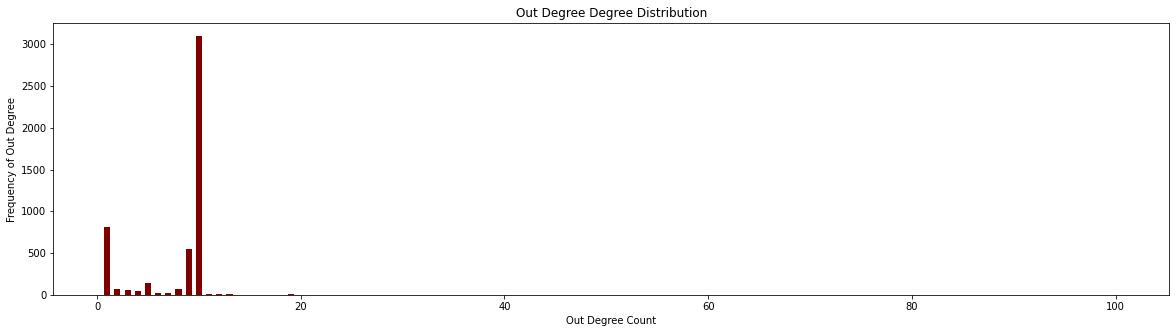

In [ ]:
 #Plot the bar graph for out degree distribution
 #This graph has out degree count on the x axis and number of nodes/frequency of that outdegree on the y axis
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='maroon',width = 0.6)
 
plt.xlabel("Out Degree Count")
plt.ylabel("Frequency of Out Degree")
plt.title("Out Degree Degree Distribution")
plt.show()

**Local Clustering Coefficient**

In [ ]:
#Get the dataframe which has 'From node' and 'To node' columns
df

,From Node,To Node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
39989,10874,3251
39990,10874,5543
39991,10874,9711
39992,10874,10875


In [ ]:
node_for_clustering_coefficient=list_of_nodes[1:]

In [ ]:
df.head()

,From Node,To Node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [ ]:
#For calculating local clustering coefficient, we iterated over each node of the graph, then found out it’s neighboring nodes and stored in the list using from-to node dataframe, then iterated over the dataframe while placing each of the neighbouring node as ‘from node’ one by one, and checking if the ‘to node’ also lies from the list created earlier, since our dataset is directed in nature we explicitly took connection from a to b, and , b to a as single edge only.
#Then, while iterating over each node, we calculated clustering coefficient as – 
#(number of connection in neighboring nodes)/(number of possible connection between neighboring node)
#Stored node as key and it’s coefficient value in dictionary.
total_count=0
clustering_coeficient_dict=dict()
for i in range(len(node_for_clustering_coefficient)):
  temp_df=df[df['From Node']==node_for_clustering_coefficient[i]]
  temp_df.reset_index(drop=True, inplace=True)

  neighbouring_nodes=[]
  for j in range(len(temp_df)):
    neighbouring_nodes.append(temp_df['To Node'][j])

  neighbour_dict=dict()

  for k in range(len(neighbouring_nodes)):
    temp_df_1=df[df['From Node']==neighbouring_nodes[k]]
    temp_df_1.reset_index(drop=True, inplace=True)

    for l in range(len(temp_df_1)):
      key=neighbouring_nodes[k]
      value=temp_df_1['To Node'][l]
      if (temp_df_1['To Node'][l] in neighbouring_nodes) and ((key in neighbour_dict and value == neighbour_dict[key]) or (value in neighbour_dict and key == neighbour_dict[value])==False):
        neighbour_dict[key]=value
        count=count+1;

  denominator=float(len(neighbouring_nodes)*(len(neighbouring_nodes)-1))

  if denominator==0:
    clustering_coeficient_dict[node_for_clustering_coefficient[i]]="NA"
  elif count==0:
    clustering_coeficient_dict[node_for_clustering_coefficient[i]]=0
  else:
    val=float(float(count)/float(denominator))
    clustering_coeficient_dict[node_for_clustering_coefficient[i]]=val
  



In [ ]:
clustering_coeficient_dict

{0: 0.011111111111111112,
 1: 0.011111111111111112,
 2: 'NA',
 3: 0.022222222222222223,
 4: 'NA',
 5: 'NA',
 6: 'NA',
 7: 'NA',
 8: 0.022222222222222223,
 9: 'NA',
 10: 0.022222222222222223,
 11: 'NA',
 12: 0.022222222222222223,
 13: 'NA',
 14: 0.022222222222222223,
 15: 'NA',
 16: 'NA',
 17: 0.05555555555555555,
 18: 'NA',
 19: 0.05555555555555555,
 20: 0.05555555555555555,
 21: 0.05555555555555555,
 22: 'NA',
 23: 0.06944444444444445,
 24: 'NA',
 25: 0.07777777777777778,
 26: 0.1,
 27: 'NA',
 28: 'NA',
 29: 'NA',
 30: 4.5,
 31: 'NA',
 32: 'NA',
 33: 'NA',
 34: 'NA',
 35: 'NA',
 36: 'NA',
 37: 'NA',
 38: 0.1,
 39: 0.1111111111111111,
 40: 'NA',
 41: 'NA',
 42: 'NA',
 43: 'NA',
 44: 'NA',
 45: 'NA',
 46: 0.1111111111111111,
 47: 'NA',
 48: 'NA',
 49: 'NA',
 50: 'NA',
 51: 'NA',
 52: 'NA',
 53: 'NA',
 54: 0.1111111111111111,
 55: 'NA',
 56: 'NA',
 57: 'NA',
 58: 0.1111111111111111,
 59: 'NA',
 60: 'NA',
 61: 'NA',
 62: 0.1527777777777778,
 63: 'NA',
 64: 'NA',
 65: 0.13333333333333333,


In [ ]:
clustering_coeficient_dict_count=dict()
for key, value in clustering_coeficient_dict.items():
  if value=='NA' or value==0:
    continue;

  if value not in clustering_coeficient_dict_count:
    clustering_coeficient_dict_count[value]=1
  else:
    clustering_coeficient_dict_count[value]=clustering_coeficient_dict_count[value]+1


In [ ]:
clustering_coeficient_dict_count

{0.0007070707070707071: 1,
 0.0008766803039158387: 1,
 0.00101010101010101: 1,
 0.001201923076923077: 1,
 0.0015664160401002505: 1,
 0.0016806722689075631: 1,
 0.002631578947368421: 1,
 0.0026455026455026454: 1,
 0.003787878787878788: 1,
 0.004761904761904762: 1,
 0.004875886524822695: 1,
 0.005494505494505495: 1,
 0.006613756613756613: 1,
 0.008333333333333333: 1,
 0.00909090909090909: 1,
 0.011111111111111112: 418,
 0.01282051282051282: 1,
 0.013888888888888888: 74,
 0.015151515151515152: 1,
 0.017857142857142856: 4,
 0.019230769230769232: 1,
 0.022222222222222223: 78,
 0.023809523809523808: 3,
 0.027777777777777776: 10,
 0.03333333333333333: 20,
 0.041666666666666664: 2,
 0.044444444444444446: 8,
 0.05: 12,
 0.05555555555555555: 8,
 0.06944444444444445: 1,
 0.08333333333333333: 4,
 0.1: 1,
 0.16666666666666666: 3}

In [ ]:
keys=[]
for i in clustering_coeficient_dict_count.keys():
  keys.append(i)

values=[]
for i in clustering_coeficient_dict_count.values():
  values.append(i)
  

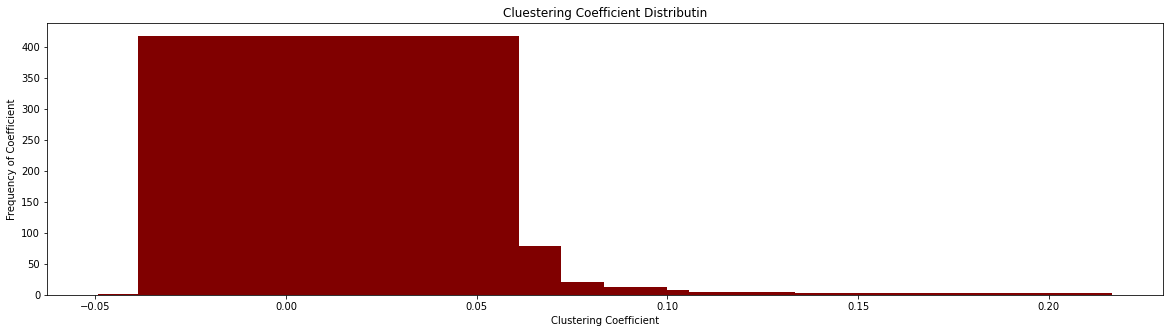

In [ ]:
 
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='maroon',width = 0.1)
 
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency of Coefficient")
plt.title("Cluestering Coefficient Distributin")
plt.show()

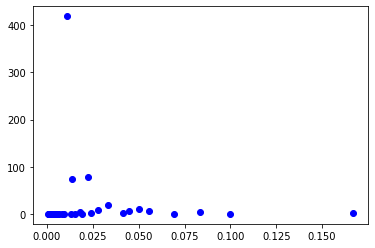

In [ ]:
plt.scatter(x, y, c ="blue")